In [411]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-alexa-reviews/amazon_alexa.tsv


# **EDA**

Checklist:
* Understanding dataset and its shape
* Checkingthe datatype of each column
* Checking the missing and duplicate values
* Descriptive summary of the dataset

In [412]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [413]:
ad = pd.read_csv("../input/amazon-alexa-reviews/amazon_alexa.tsv", delimiter='\t')

In [414]:
ad.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [415]:
ad.shape

(3150, 5)

In [416]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [417]:
ad['date'] = pd.to_datetime(ad['date'], errors='coerce')

In [418]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rating            3150 non-null   int64         
 1   date              3150 non-null   datetime64[ns]
 2   variation         3150 non-null   object        
 3   verified_reviews  3150 non-null   object        
 4   feedback          3150 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 123.2+ KB


In [419]:
ad.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [420]:
ad.duplicated().sum()

715

In [421]:
ad=ad.drop_duplicates()

In [422]:
ad.duplicated().sum()

0

In [423]:
ad.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rating,2435.0,4.435318,1.109562,1.0,4.0,5.0,5.0,5.0
feedback,2435.0,0.909240,0.287326,0.0,1.0,1.0,1.0,1.0


## Visualizing the data

In [424]:
ad["rating"].value_counts()

5    1756
4     345
1     141
3     113
2      80
Name: rating, dtype: int64

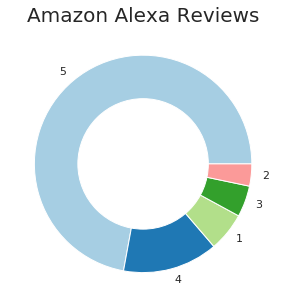

In [425]:
from palettable.colorbrewer.qualitative import Paired_6
ratings = ad["rating"].value_counts()
rating_idx = ratings.index
quantity_val = ratings.values

my_circle = plt.Circle( (0,0), 0.6, color='white')
plt.figure(figsize=(5, 5))

plt.pie(quantity_val, labels=rating_idx, colors=Paired_6.hex_colors)

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.rc('font', size=12)
plt.title("Amazon Alexa Reviews", fontsize=20)

plt.show()

<AxesSubplot:xlabel='date', ylabel='rating'>

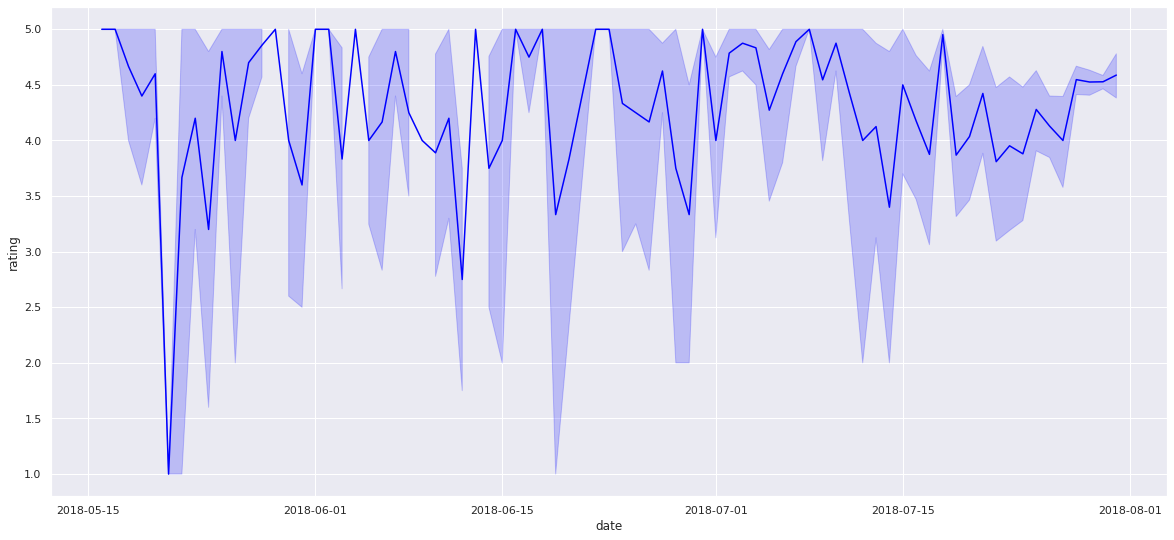

In [426]:
fig, ax = plt.subplots(figsize=(20,9))
sns.set_style("white")
sns.set_style("darkgrid")

sns.lineplot(x = "date", y = "rating",data = ad,color='blue')
#sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [427]:
feedbacks = ad['feedback'].value_counts()
print(feedbacks)

1    2214
0     221
Name: feedback, dtype: int64


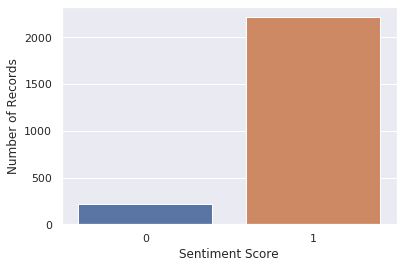

In [428]:
sns.set_theme(style="darkgrid")
sns.countplot(x='feedback', data=ad)
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Records')
plt.show()

sns.set_theme(style="darkgrid")

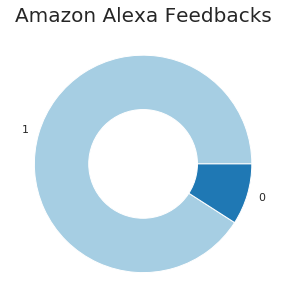

In [429]:
from palettable.colorbrewer.qualitative import Paired_6
feedbacks = ad["feedback"].value_counts()
rating_idx = feedbacks.index
quantity_val = feedbacks.values

my_circle = plt.Circle( (0,0), 0.5, color='white')
plt.figure(figsize=(5, 5))


plt.pie(quantity_val, labels=rating_idx, colors=Paired_6.hex_colors)

circle = plt.Circle( (0,0), 0.8, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.rc('font', size=21)
plt.title("Amazon Alexa Feedbacks", fontsize=20)

plt.show()

In [430]:
ad.variation.unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

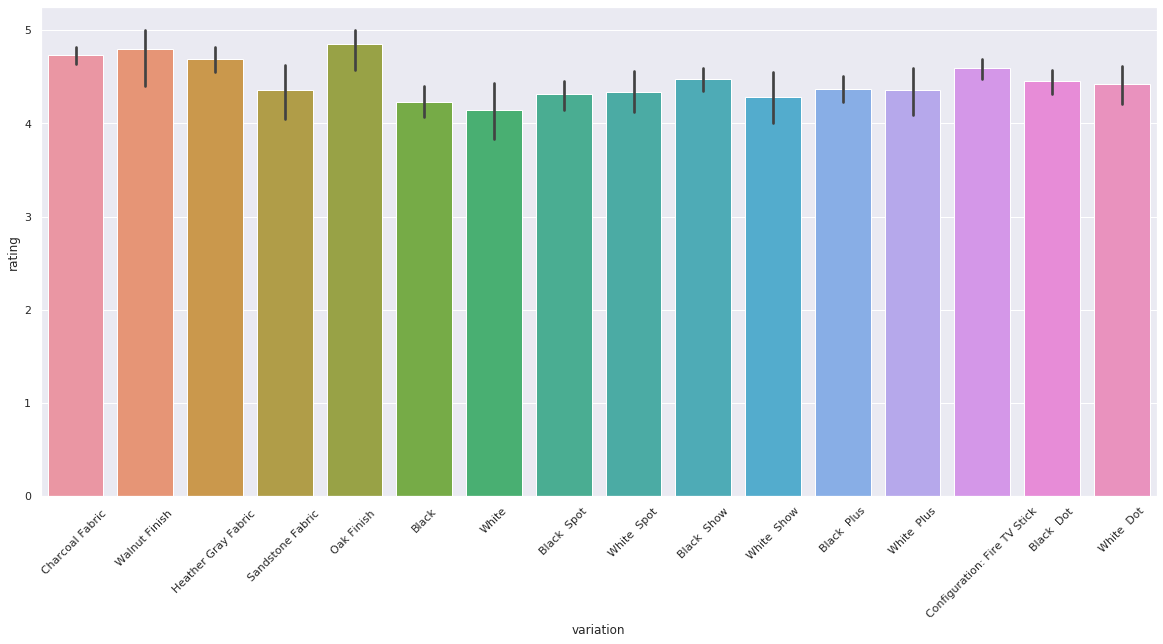

In [431]:

sns.set_style("white")
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20,9))

ax = sns.barplot(x="variation", y="rating", data=ad)
ax.tick_params(axis='x', rotation=45)
#plt.xticks(rotation=45)

Checking the overall distribution of variations of Alexa

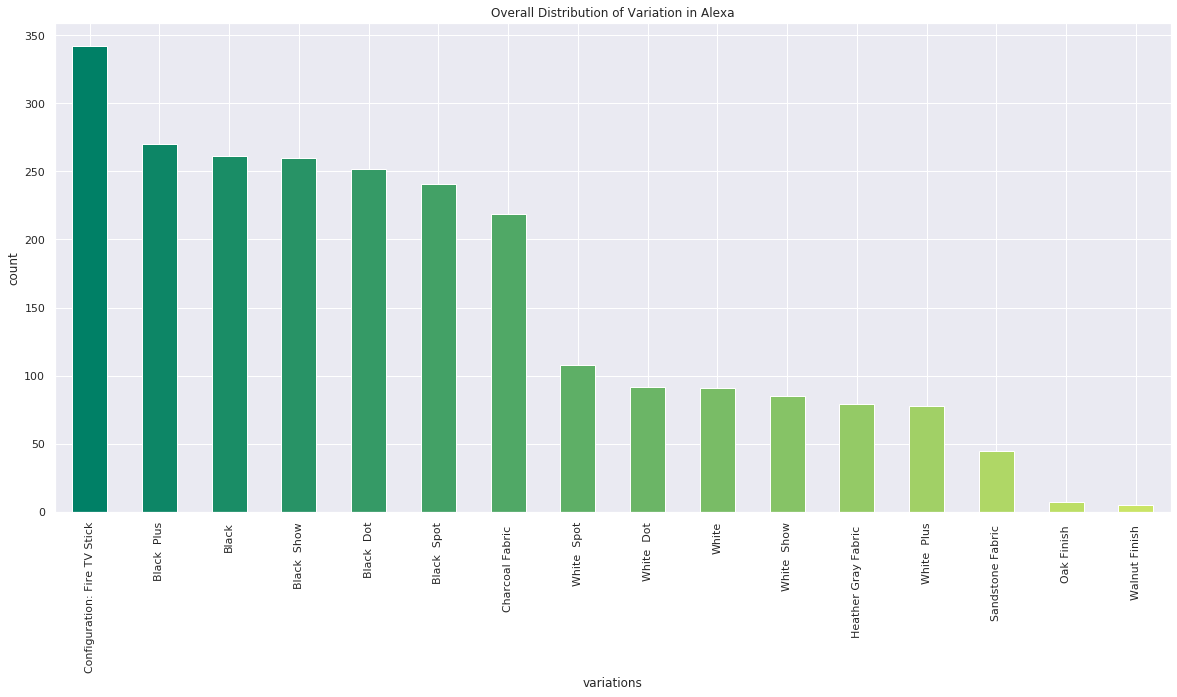

In [432]:
c2 = plt.cm.summer(np.linspace(0, 1, 20))
sns.set_style("white")
sns.set_style("darkgrid")

ad['variation'].value_counts().plot(kind='bar',color=c2, figsize=(20,9))



plt.title('Overall Distribution of Variation in Alexa')
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

Getting the Highest rated variation of Alexa

In [433]:
high_rat=ad[ad.rating==5]
high_rat.variation.value_counts().to_frame()

,variation
Configuration: Fire TV Stick,275
Black Plus,187
Black Show,185
Charcoal Fabric,180
Black Dot,177
Black,176
Black Spot,168
White Spot,73
Heather Gray Fabric,62
White Dot,62


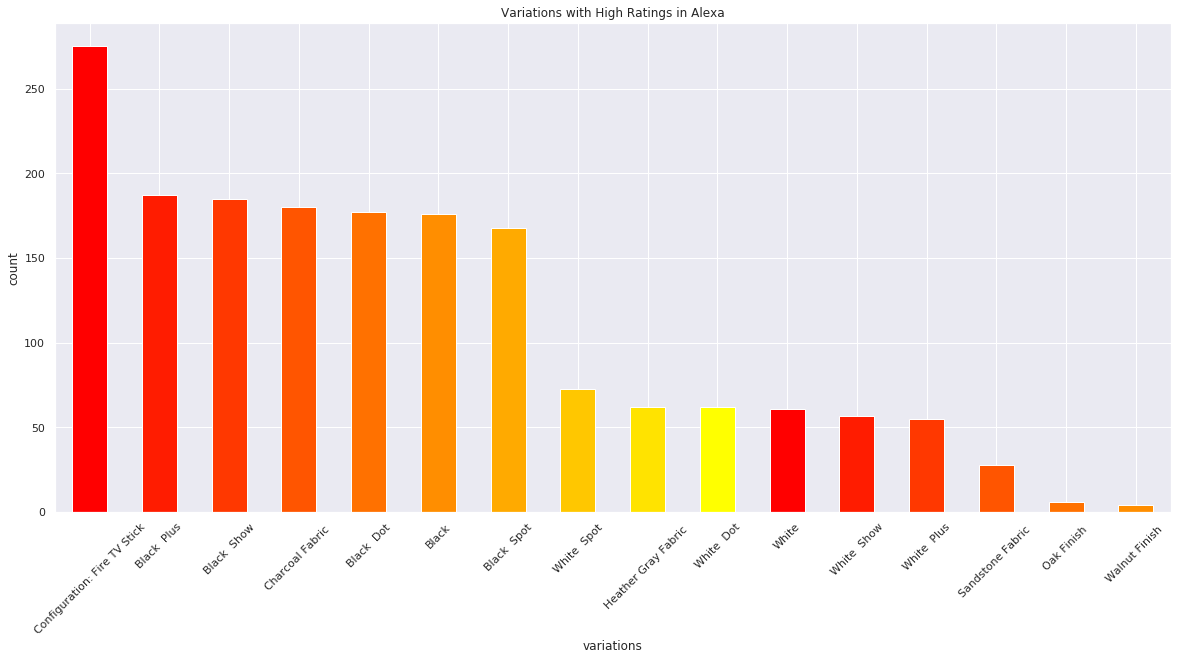

In [434]:
c = plt.cm.autumn(np.linspace(0,1,10))
sns.set_style("white")
sns.set_style("darkgrid")
high_rat['variation'].value_counts().plot(kind='bar',color=c, figsize=(20,9))
#plt.grid(visible=None)
plt.style.use(['dark_background'])
plt.title('Variations with High Ratings in Alexa')
plt.xlabel('variations')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

Getting the Lowest rating variation of Alexa

In [435]:
low_rat=ad[ad.rating==1]
low_rat.variation.value_counts().to_frame()

,variation
Black,30
Black Spot,18
Black Plus,17
White,13
Configuration: Fire TV Stick,13
Black Dot,11
Black Show,10
White Spot,8
White Show,8
White Plus,5


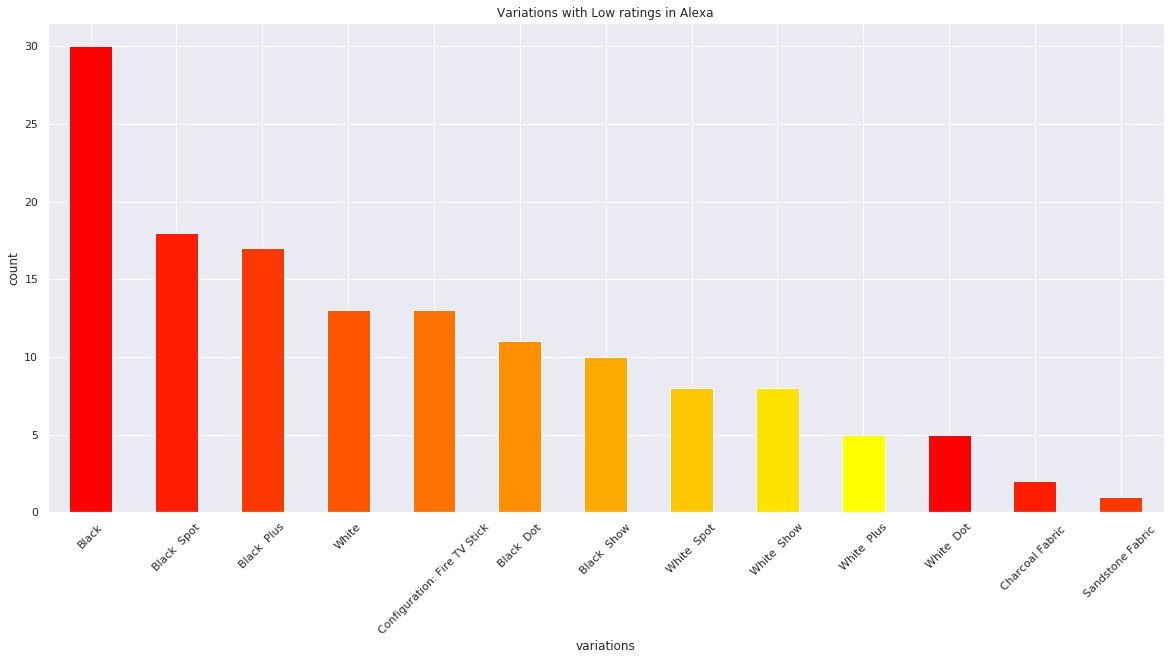

In [436]:
c = plt.cm.autumn(np.linspace(0,1,10))
sns.set_style("white")
sns.set_style("darkgrid")
low_rat['variation'].value_counts().plot(kind='bar',color=c, figsize=(20,9))
#plt.grid(visible=None)
plt.style.use(['dark_background'])
plt.title('Variations with Low ratings in Alexa')
plt.xlabel('variations')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

# Sentiment Analysis

In [437]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

sentiments = SentimentIntensityAnalyzer()
ad["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in ad["verified_reviews"]]
ad["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in ad["verified_reviews"]]
ad["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in ad["verified_reviews"]]
print(ad.head())

   rating       date         variation  \
0       5 2018-07-31  Charcoal Fabric    
1       5 2018-07-31  Charcoal Fabric    
2       4 2018-07-31    Walnut Finish    
3       5 2018-07-31  Charcoal Fabric    
4       5 2018-07-31  Charcoal Fabric    

                                    verified_reviews  feedback  Positive  \
0                                      Love my Echo!         1     0.692   
1                                          Loved it!         1     0.807   
2  Sometimes while playing a game, you can answer...         1     0.114   
3  I have had a lot of fun with this thing. My 4 ...         1     0.383   
4                                              Music         1     0.000   

   Negative  Neutral  
0     0.000    0.308  
1     0.000    0.193  
2     0.102    0.784  
3     0.000    0.617  
4     0.000    1.000  


In [438]:
x = sum(ad["Positive"])
y = sum(ad["Negative"])
z = sum(ad["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)


Neutral 🙂 


In [439]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  792.9990000000003
Negative:  76.87799999999999
Neutral:  1514.1259999999982


Looking at the top 20 most frequently occuring words

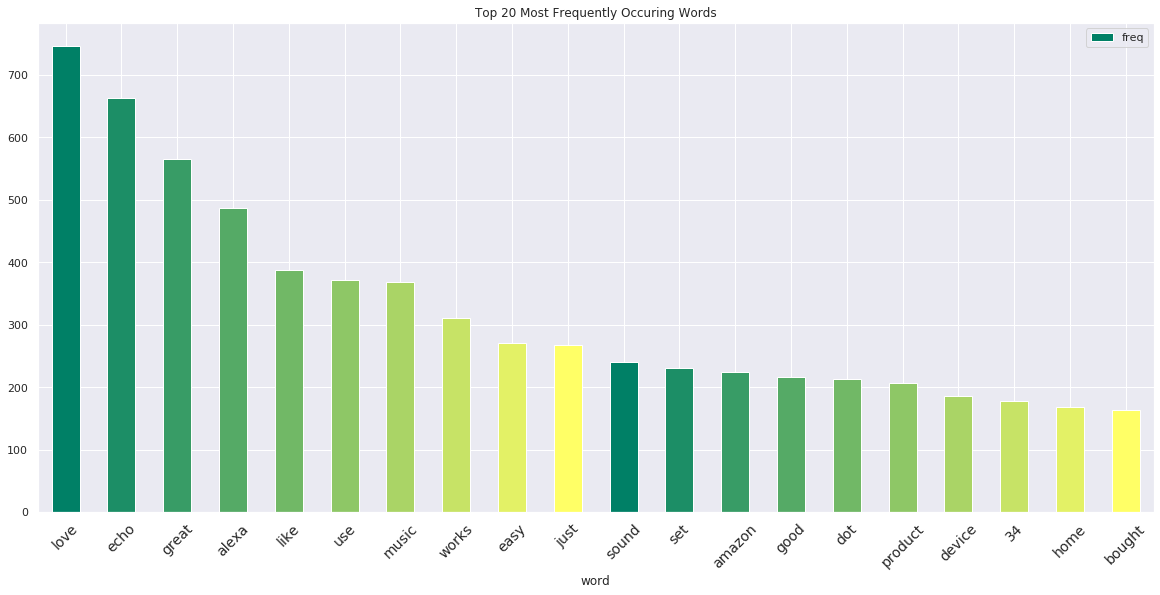

In [440]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(ad['verified_reviews'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
fqn = pd.DataFrame(words_freq, columns=['word', 'freq'])


sns.set_style("white")
sns.set_style("darkgrid")
plt.style.use('_classic_test_patch')
c2 = plt.cm.summer(np.linspace(0, 1, 10))

fqn.head(20).plot(x='word', y='freq', kind='bar', figsize=(20, 9), color = c2)
#plt.style.use(['dark_background'])
plt.title("Top 20 Most Frequently Occuring Words")
plt.xticks(fontsize=14, rotation=45)
plt.show()